In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
df = pd.read_csv("customer_churn.csv")
df.samples(5)

AttributeError: 'DataFrame' object has no attribute 'samples'

In [7]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
473,4104-PVRPS,Male,0,Yes,No,24,Yes,No,DSL,Yes,No,No,Yes,No,No,Month-to-month,No,Mailed check,53.60,1315.35,No
1452,0222-CNVPT,Male,1,No,No,52,No,No phone service,DSL,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),48.80,2555.05,No
5713,8050-DVOJX,Male,1,No,No,49,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),81.35,4060.9,No
2811,5804-JMYIO,Female,0,Yes,Yes,39,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.75,757.95,No
2574,3269-ATYWD,Male,1,No,No,39,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),95.65,3759.05,Yes


In [8]:
df.shape

(7043, 21)

In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
def changeColumnsToString(df):
    columnsNames=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
    for col in columnsNames:
        df[col]=df[col].astype('str').str.replace('Yes','1').replace('No','0').replace('No internet service','0').replace('No phone service',0)

changeColumnsToString(df)

df['SeniorCitizen']=df['SeniorCitizen'].astype(bool)
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [11]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,False,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0


In [12]:
print("Payment methods: ",df.PaymentMethod.unique())
print("Contract types: ",df.Contract.unique())
print("Gender: ",df.gender.unique())
print("Senior Citizen: ",df.SeniorCitizen.unique())
print("Internet Service Types: ",df.InternetService.unique())

Payment methods:  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Contract types:  ['Month-to-month' 'One year' 'Two year']
Gender:  ['Female' 'Male']
Senior Citizen:  [False  True]
Internet Service Types:  ['DSL' 'Fiber optic' 'No']


In [13]:
df['gender']=df['gender'].astype('category')
df['PaymentMethod']=df['PaymentMethod'].astype('category')
df['Contract']=df['Contract'].astype('category')
df['SeniorCitizen']=df['SeniorCitizen'].astype('category')
df['InternetService']=df['InternetService'].astype('category')
df.dtypes

customerID            object
gender              category
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService     category
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract            category
PaperlessBilling      object
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object

In [14]:
dfPaymentDummies = pd.get_dummies(df['PaymentMethod'], prefix = 'payment')
dfContractDummies = pd.get_dummies(df['Contract'], prefix = 'contract')
dfGenderDummies = pd.get_dummies(df['gender'], prefix = 'gender')
dfSeniorCitizenDummies = pd.get_dummies(df['SeniorCitizen'], prefix = 'SC')
dfInternetServiceDummies = pd.get_dummies(df['InternetService'], prefix = 'IS')

print(dfPaymentDummies.head(3))
print(dfContractDummies.head(3))
print(dfGenderDummies.head(3))
print(dfSeniorCitizenDummies.head(3))
print(dfInternetServiceDummies.head(3))

   payment_Bank transfer (automatic)  payment_Credit card (automatic)  \
0                                  0                                0   
1                                  0                                0   
2                                  0                                0   

   payment_Electronic check  payment_Mailed check  
0                         1                     0  
1                         0                     1  
2                         0                     1  
   contract_Month-to-month  contract_One year  contract_Two year
0                        1                  0                  0
1                        0                  1                  0
2                        1                  0                  0
   gender_Female  gender_Male
0              1            0
1              0            1
2              0            1
   SC_False  SC_True
0         1        0
1         1        0
2         1        0
   IS_DSL  IS_Fiber optic  IS_No
0 

In [15]:
df.drop(['gender','PaymentMethod','Contract','SeniorCitizen','InternetService'], axis=1, inplace=True)

df = pd.concat([df, dfPaymentDummies], axis=1)
df = pd.concat([df, dfContractDummies], axis=1)
df = pd.concat([df, dfGenderDummies], axis=1)
df = pd.concat([df, dfSeniorCitizenDummies], axis=1)
df = pd.concat([df, dfInternetServiceDummies], axis=1)
df.head(2)

,customerID,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,payment_Bank transfer (automatic),payment_Credit card (automatic),payment_Electronic check,payment_Mailed check,contract_Month-to-month,contract_One year,contract_Two year,gender_Female,gender_Male,SC_False,SC_True,IS_DSL,IS_Fiber optic,IS_No
0,7590-VHVEG,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0
1,5575-GNVDE,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0


In [16]:
df.columns = ['customerID', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn',
       'payment_Bank_transfer_auto', 'payment_Credit_card_auto',
       'payment_Electronic_check', 'payment_Mailed_check',
       'contract_Month_to_month', 'contract_One_year', 'contract_Two_year',
       'gender_Female', 'gender_Male', 'SC_False', 'SC_True', 'IS_DSL',
       'IS_Fiber_optic', 'IS_No']

In [17]:
numericColumns=np.array(['Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn',
       'payment_Bank_transfer_auto', 'payment_Credit_card_auto',
       'payment_Electronic_check', 'payment_Mailed_check',
       'contract_Month_to_month', 'contract_One_year', 'contract_Two_year',
       'gender_Female', 'gender_Male', 'SC_False', 'SC_True', 'IS_DSL',
       'IS_Fiber_optic', 'IS_No'])

for columnName in numericColumns:
    df[columnName]=pd.to_numeric(df[columnName],errors='coerce')
df.dtypes

customerID                     object
Partner                         int64
Dependents                      int64
tenure                          int64
PhoneService                    int64
MultipleLines                   int64
OnlineSecurity                  int64
OnlineBackup                    int64
DeviceProtection                int64
TechSupport                     int64
StreamingTV                     int64
StreamingMovies                 int64
PaperlessBilling                int64
MonthlyCharges                float64
TotalCharges                  float64
Churn                           int64
payment_Bank_transfer_auto      uint8
payment_Credit_card_auto        uint8
payment_Electronic_check        uint8
payment_Mailed_check            uint8
contract_Month_to_month         uint8
contract_One_year               uint8
contract_Two_year               uint8
gender_Female                   uint8
gender_Male                     uint8
SC_False                        uint8
SC_True     

In [18]:
modelData = df.loc[:, df.columns != 'customerID']
modelData.to_csv('modelData.csv')

In [19]:
modelData=pd.read_csv('modelData.csv')

modelData[modelData==np.inf]=np.nan
modelData.fillna(modelData.mean(), inplace=True)

x=np.asarray(modelData.loc[:,modelData.columns != 'Churn'])
y=np.asarray(modelData['Churn'])

print(x[:2])
print(y[:2])

[[0.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  1.0000e+00 2.9850e+01 2.9850e+01 0.0000e+00 0.0000e+00 1.0000e+00
  0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00
  1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00]
 [1.0000e+00 0.0000e+00 0.0000e+00 3.4000e+01 1.0000e+00 0.0000e+00
  1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 5.6950e+01 1.8895e+03 0.0000e+00 0.0000e+00 0.0000e+00
  1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00
  1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00]]
[0 0]


In [20]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)
x[0:2]

array([[-1.7318049 ,  1.03453023, -0.65401193, -1.27744458, -3.05401039,
        -0.85417615, -0.63393298,  1.3782406 , -0.72396752, -0.63943864,
        -0.79013171, -0.79607014,  0.8297975 , -1.16032292, -0.99497138,
        -0.5298852 , -0.52504733,  1.40641839, -0.54480692,  0.90418382,
        -0.51424938, -0.56297505,  1.00955867, -1.00955867,  0.43991649,
        -0.43991649,  1.38171215, -0.88565976, -0.52592737],
       [-1.73131305, -0.96662231, -0.65401193,  0.06632742,  0.32743831,
        -0.85417615,  1.57745383, -0.72556272,  1.38127743, -0.63943864,
        -0.79013171, -0.79607014, -1.20511329, -0.25962894, -0.17387565,
        -0.5298852 , -0.52504733, -0.71102597,  1.83551265, -1.1059698 ,
         1.94458183, -0.56297505, -0.99053183,  0.99053183,  0.43991649,
        -0.43991649,  1.38171215, -0.88565976, -0.52592737]])

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=72)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (5634, 29) (5634,)
Test set: (1409, 29) (1409,)


In [22]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=37), threshold='median')
select.fit(X_train, y_train)

X_train_s = select.transform(X_train)

print('The shape of x_train: ',X_train.shape)
print('The shape of x_train_s: ',X_train_s.shape)

The shape of x_train:  (5634, 29)
The shape of x_train_s:  (5634, 15)


Text(0.5, 0, 'Index of features')

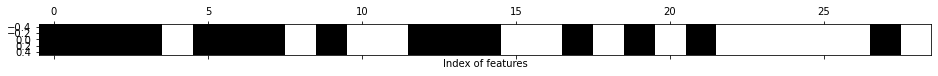

In [23]:
mask=select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel('Index of features')

In [24]:
X_test_s = select.transform(X_test)

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
score = lr.fit(X_train_s,y_train).score(X_test_s, y_test)
print('The score of Logistic Regerssion for customer churn: {:.3f}'.format(score))

The score of Logistic Regerssion for customer churn: 0.796
